In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [2]:
athlete_data = pd.read_csv('athlete_events.csv')

In [3]:
athlete_data.head(25)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
region_data = pd.read_csv('noc_regions.csv')

In [5]:
region_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
athlete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [7]:
nan_count_per_column = athlete_data.isna().sum()
print("Number of NaN values in each column:")
print(nan_count_per_column)

Number of NaN values in each column:
ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64


In [8]:
duplicate_count = len(athlete_data[athlete_data.duplicated()])
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [9]:
# Remove duplicate rows
athlete_data= athlete_data.drop_duplicates()

# Print the resulting DataFrame without duplicates
print(athlete_data)

# Optionally, you can save the DataFrame without duplicates to a new CSV file
athlete_data.to_csv('athlete_events.csv', index=False)

            ID                      Name Sex   Age  Height  Weight   
0            1                 A Dijiang   M  24.0   180.0    80.0  \
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
269726  135569                Andrzej ya   M  29.0   179.0    89.0   
269727  135570                  Piotr ya   M  27.0   176.0    59.0   
269728  135570                  Piotr ya   M  27.0   176.0    59.0   
269729  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
269730  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City   
0                China  CHN  1992 Summer  1992  Summer       Barcelona  \
1          

In [10]:
athlete_data.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


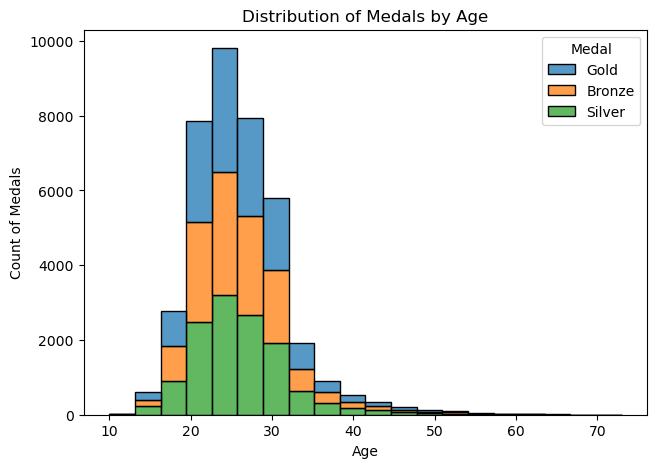

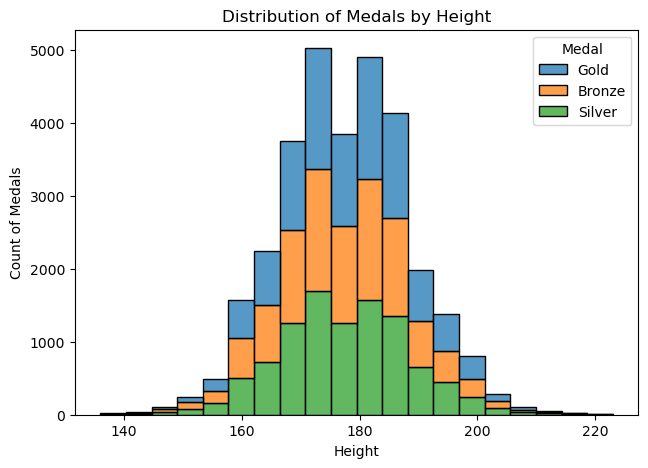

In [11]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=athlete_data, x='Age', hue='Medal', multiple='stack', bins=20)
plt.xlabel('Age')
plt.ylabel('Count of Medals')
plt.title('Distribution of Medals by Age')
plt.show()
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 2)
sns.histplot(data=athlete_data, x='Height', hue='Medal', multiple='stack', bins=20)
plt.xlabel('Height')
plt.ylabel('Count of Medals')
plt.title('Distribution of Medals by Height')
plt.show()

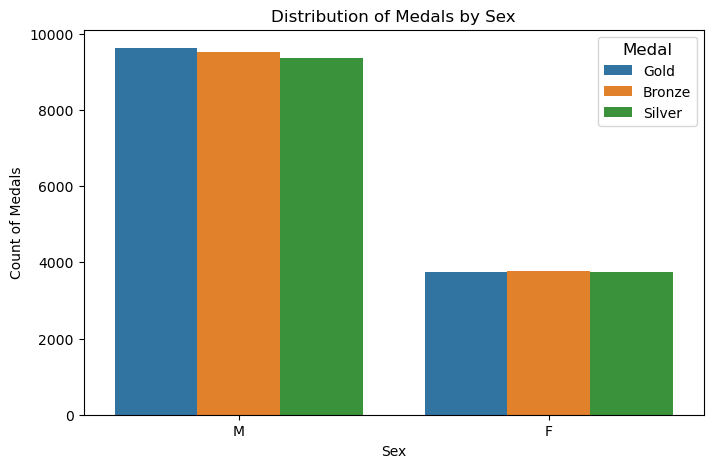

In [12]:
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
sns.countplot(data=athlete_data, x='Sex', hue='Medal')
plt.xlabel('Sex')
plt.ylabel('Count of Medals')
plt.title('Distribution of Medals by Sex')
plt.legend(title='Medal', title_fontsize='12')
plt.show()

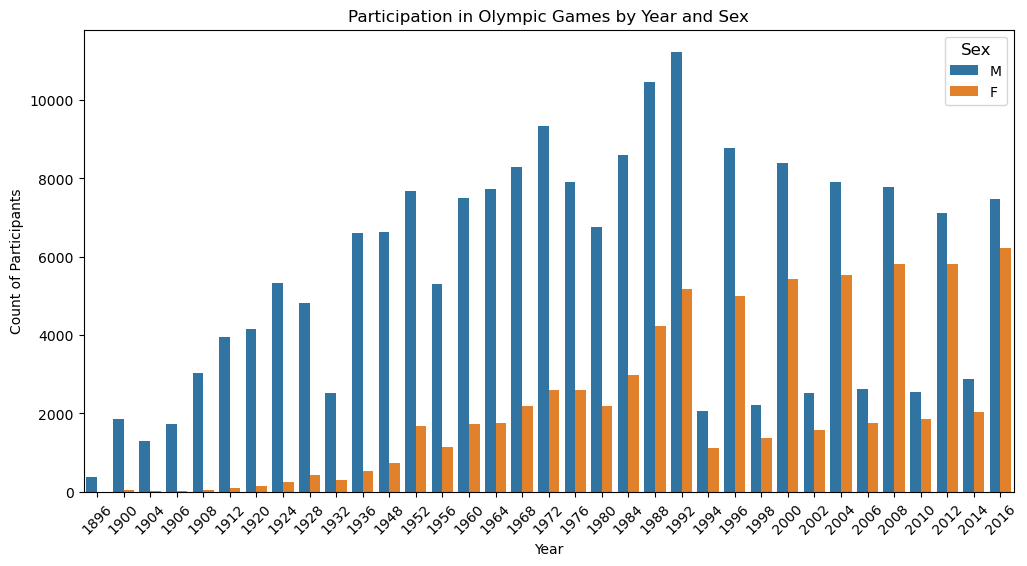

In [13]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.countplot(data=athlete_data, x='Year', hue='Sex')
plt.xlabel('Year')
plt.ylabel('Count of Participants')
plt.title('Participation in Olympic Games by Year and Sex')
plt.legend(title='Sex', title_fontsize='12')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

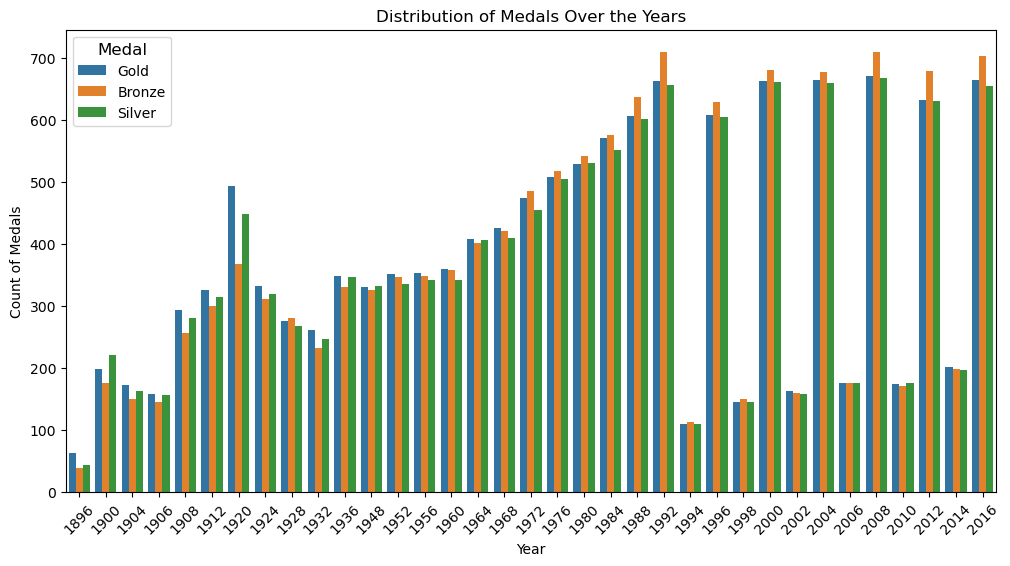

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'train_data' with columns 'Year' and 'Medal'

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.countplot(data=athlete_data, x='Year', hue='Medal')
plt.xlabel('Year')
plt.ylabel('Count of Medals')
plt.title('Distribution of Medals Over the Years')
plt.legend(title='Medal', title_fontsize='12')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


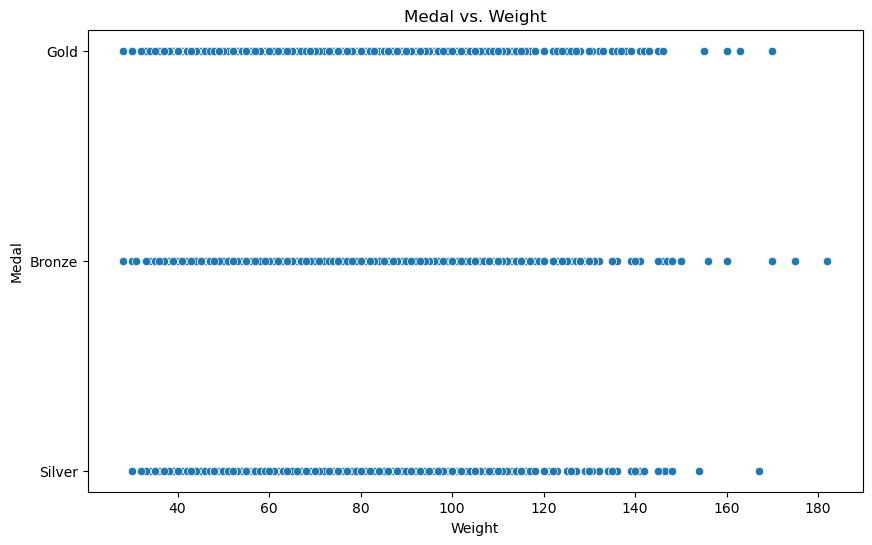

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'train_data' with columns 'Medal' and 'Weight'

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(data=athlete_data, x='Weight', y='Medal')
plt.xlabel('Weight')
plt.ylabel('Medal')
plt.title('Medal vs. Weight')
plt.show()


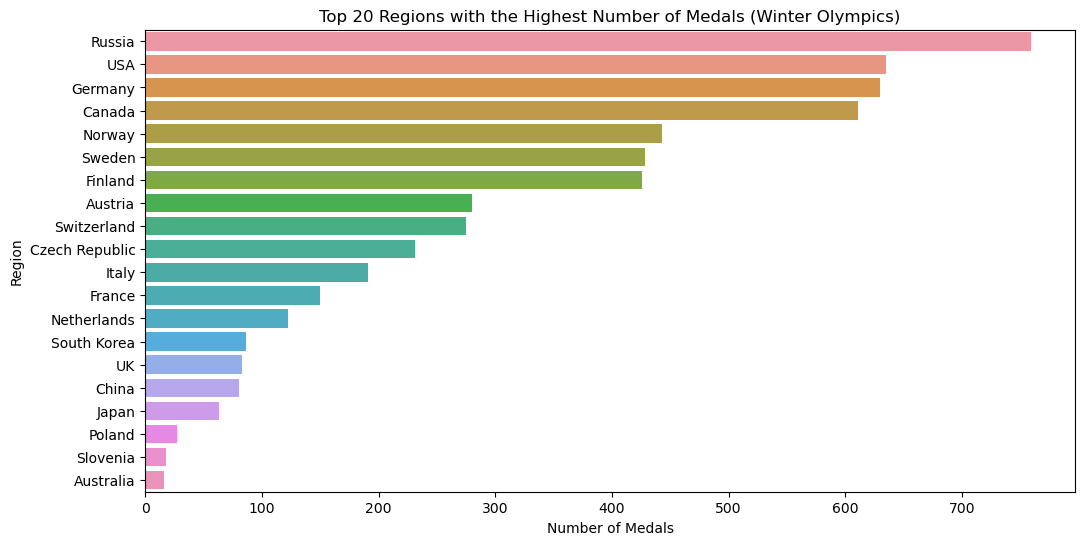

In [16]:
winter_df = athlete_data[athlete_data['Season'] == 'Winter']

merged_data = pd.merge(winter_df, region_data, on='NOC', how='left')

region_medal_counts = merged_data.groupby('region')['Medal'].count().reset_index()

sorted_region_medals = region_medal_counts.sort_values(by='Medal', ascending=False)

top_n = 20 
plt.figure(figsize=(12, 6))
sns.barplot(x='Medal', y='region', data=sorted_region_medals.head(top_n))
plt.xlabel('Number of Medals')
plt.ylabel('Region')
plt.title(f'Top {top_n} Regions with the Highest Number of Medals (Winter Olympics)')
plt.show()

In [17]:
merged_data = pd.merge(athlete_data, region_data, on='NOC', how='left')

region_medal_counts = merged_data.groupby('region')['Medal'].count().reset_index()

sorted_region_medal_list = region_medal_counts.sort_values(by='Medal', ascending=False).head(25)

for index, row in sorted_region_medal_list.iterrows():
    print(f"Region: {row['region']}, Medals: {row['Medal']}")


Region: USA, Medals: 5637
Region: Russia, Medals: 3947
Region: Germany, Medals: 3756
Region: UK, Medals: 2067
Region: France, Medals: 1767
Region: Italy, Medals: 1637
Region: Sweden, Medals: 1536
Region: Canada, Medals: 1352
Region: Australia, Medals: 1349
Region: Hungary, Medals: 1135
Region: Netherlands, Medals: 1040
Region: Norway, Medals: 1033
Region: China, Medals: 993
Region: Japan, Medals: 913
Region: Finland, Medals: 900
Region: Switzerland, Medals: 691
Region: Romania, Medals: 653
Region: Czech Republic, Medals: 644
Region: South Korea, Medals: 638
Region: Denmark, Medals: 597
Region: Poland, Medals: 565
Region: Serbia, Medals: 539
Region: Spain, Medals: 489
Region: Brazil, Medals: 475
Region: Belgium, Medals: 468


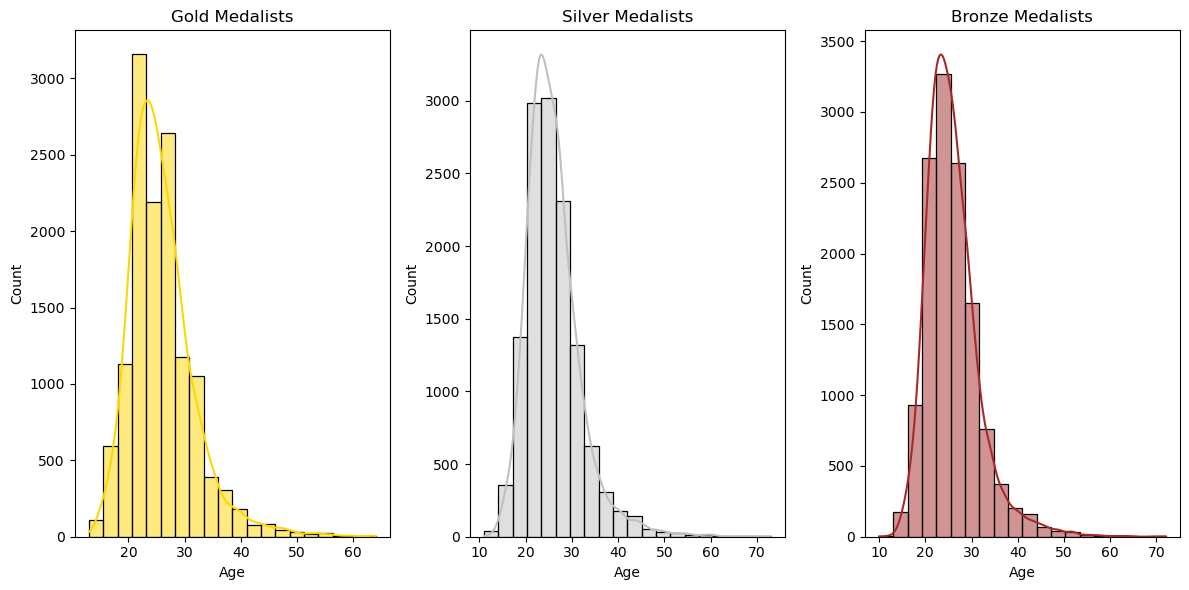

In [18]:
filtered_data = athlete_data[(athlete_data['Medal'] == 'Gold') | (athlete_data['Medal'] == 'Silver') | (athlete_data['Medal'] == 'Bronze')]

plt.figure(figsize=(12, 6))

plt.subplot(131)
sns.histplot(data=filtered_data[filtered_data['Medal'] == 'Gold'], x='Age', bins=20, kde=True, color='gold')
plt.title('Gold Medalists')

plt.subplot(132)
sns.histplot(data=filtered_data[filtered_data['Medal'] == 'Silver'], x='Age', bins=20, kde=True, color='silver')
plt.title('Silver Medalists')

plt.subplot(133)
sns.histplot(data=filtered_data[filtered_data['Medal'] == 'Bronze'], x='Age', bins=20, kde=True, color='brown')
plt.title('Bronze Medalists')

plt.tight_layout()
plt.show()


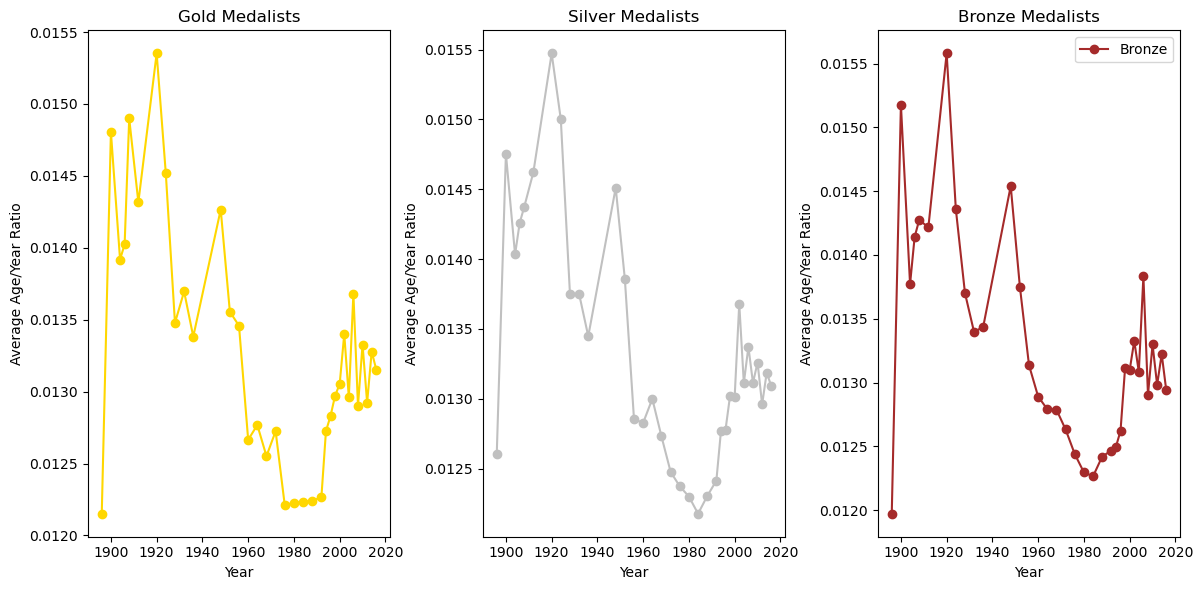

In [20]:
athlete_data['Age_Year_Ratio'] = athlete_data['Age'] / athlete_data['Year']

average_ratios = athlete_data.groupby(['Medal', 'Year'])['Age_Year_Ratio'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(131)
gold_data = average_ratios[average_ratios['Medal'] == 'Gold']
plt.plot(gold_data['Year'], gold_data['Age_Year_Ratio'], marker='o', label='Gold', color='gold')
plt.xlabel('Year')
plt.ylabel('Average Age/Year Ratio')
plt.title('Gold Medalists')

plt.subplot(132)
silver_data = average_ratios[average_ratios['Medal'] == 'Silver']
plt.plot(silver_data['Year'], silver_data['Age_Year_Ratio'], marker='o', label='Silver', color='silver')
plt.xlabel('Year')
plt.ylabel('Average Age/Year Ratio')
plt.title('Silver Medalists')

plt.subplot(133)
bronze_data = average_ratios[average_ratios['Medal'] == 'Bronze']
plt.plot(bronze_data['Year'], bronze_data['Age_Year_Ratio'], marker='o', label='Bronze', color='brown')
plt.xlabel('Year')
plt.ylabel('Average Age/Year Ratio')
plt.title('Bronze Medalists')

plt.tight_layout()
plt.legend()
plt.show()


C:\Users\Mostafa\AppData\Local\Temp\ipykernel_32140\4048448080.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=athlete_data, x='BMI', y='Sport', order=sorted_sports, ci=None)


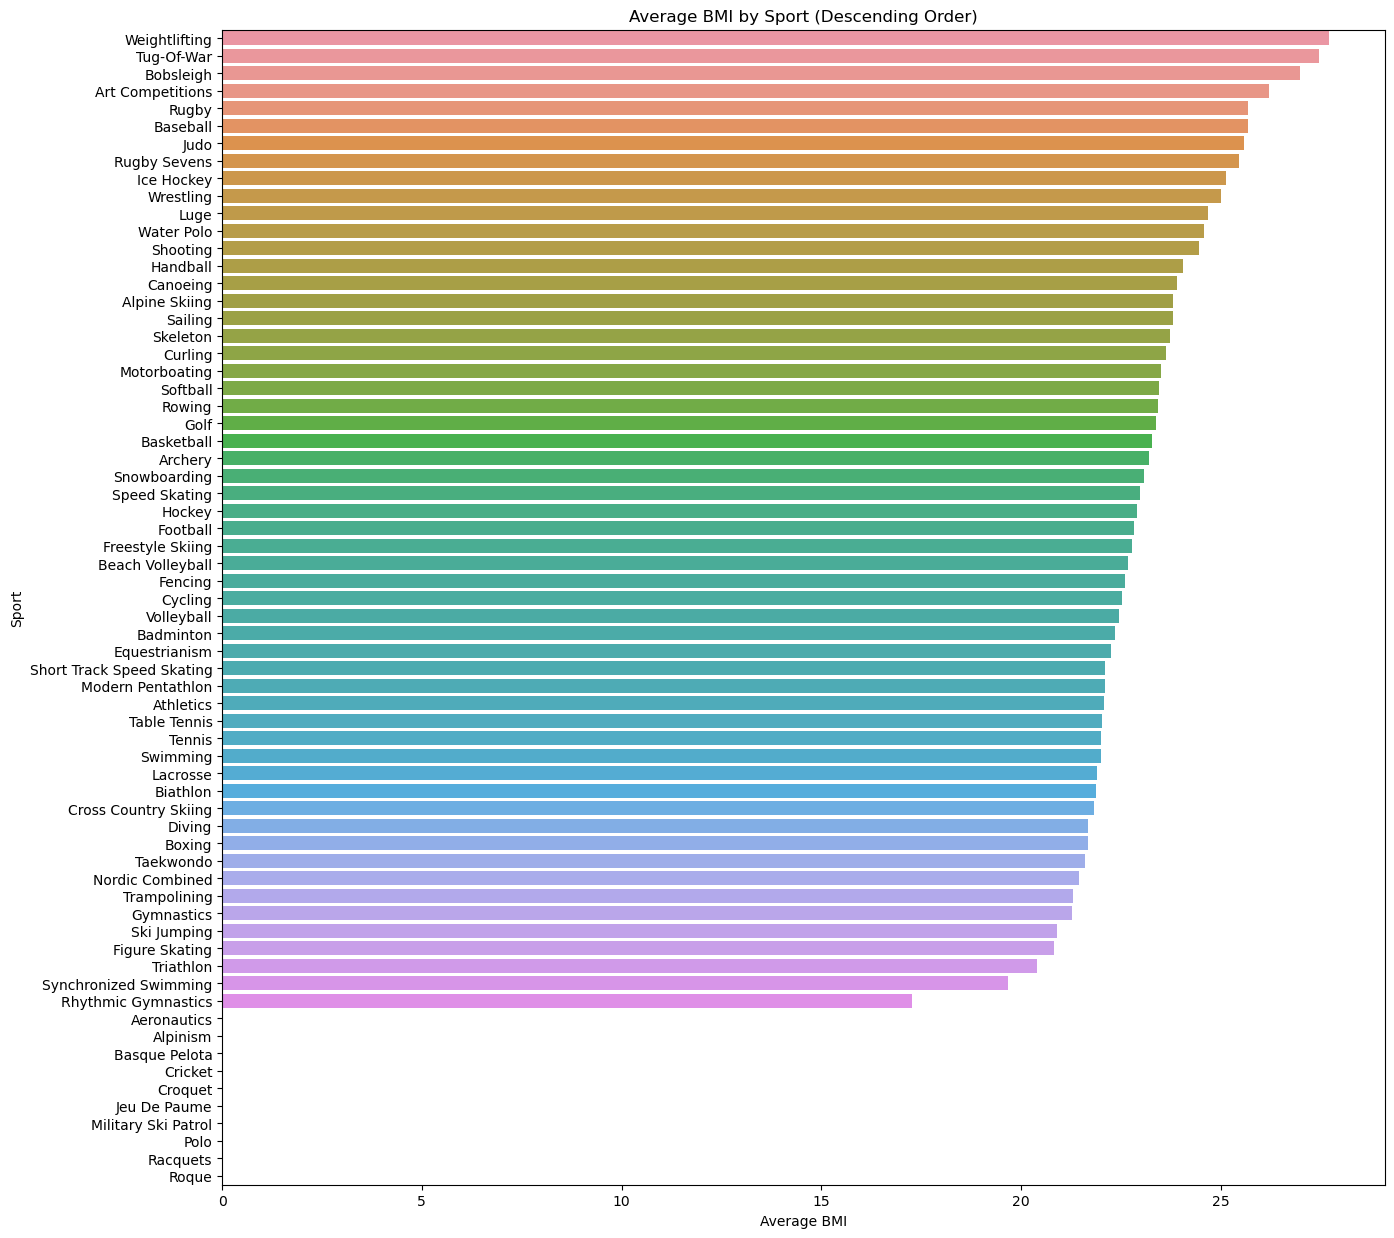

In [30]:
athlete_data['Height_meters'] = athlete_data['Height'] / 100

athlete_data['BMI'] = athlete_data['Weight'] / (athlete_data['Height_meters'] ** 2)

average_bmi_by_sport = athlete_data.groupby('Sport')['BMI'].mean().reset_index()

sorted_sports = average_bmi_by_sport.sort_values(by='BMI', ascending=False)['Sport']

plt.figure(figsize=(15, 15))
sns.barplot(data=athlete_data, x='BMI', y='Sport', order=sorted_sports, ci=None)
plt.title('Average BMI by Sport (Descending Order)')
plt.xlabel('Average BMI')
plt.ylabel('Sport')
plt.show()

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_32140\3376941019.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_diverse_athletes['Name'] = top_15_diverse_athletes['ID'].map(id_to_name)


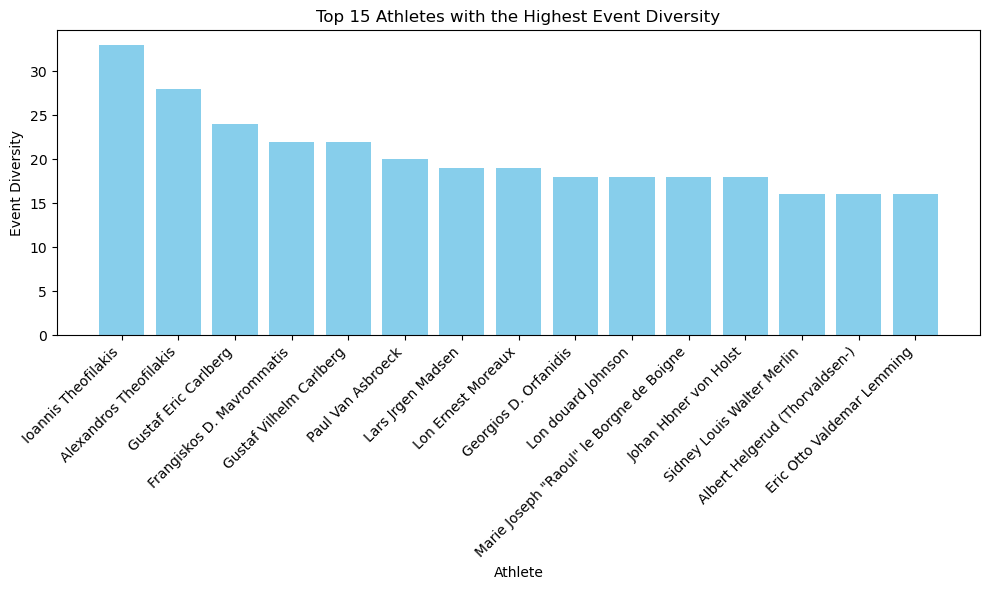

In [60]:
id_to_name = athlete_data.set_index('ID')['Name'].to_dict()

athlete_event_diversity = athlete_data.groupby('ID')['Event'].nunique().reset_index()

athlete_event_diversity = athlete_event_diversity.sort_values(by='Event', ascending=False)

top_15_diverse_athletes = athlete_event_diversity.head(15)

top_15_diverse_athletes['Name'] = top_15_diverse_athletes['ID'].map(id_to_name)

plt.figure(figsize=(10, 6))
plt.bar(top_15_diverse_athletes['Name'], top_15_diverse_athletes['Event'], color='skyblue')
plt.xlabel('Athlete')
plt.ylabel('Event Diversity')
plt.title('Top 15 Athletes with the Highest Event Diversity')
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()  

plt.show()

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_32140\1390084304.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_medal_winners['Name'] = top_15_medal_winners['ID'].map(id_to_name)


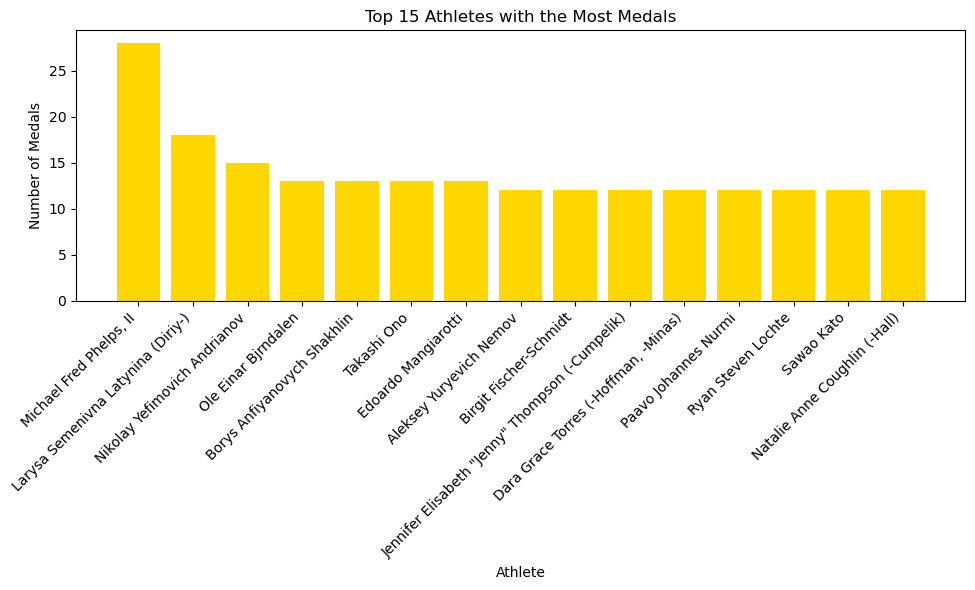

In [61]:
id_to_name = athlete_data.set_index('ID')['Name'].to_dict()

medal_winners = athlete_data[athlete_data['Medal'].notnull()]

athlete_medal_counts = medal_winners.groupby('ID')['Medal'].count().reset_index()

athlete_medal_counts = athlete_medal_counts.sort_values(by='Medal', ascending=False)

top_15_medal_winners = athlete_medal_counts.head(15)

top_15_medal_winners['Name'] = top_15_medal_winners['ID'].map(id_to_name)

plt.bar(top_15_medal_winners['Name'], top_15_medal_winners['Medal'], color='gold')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.title('Top 15 Athletes with the Most Medals')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff

plt.show()
